### What are the null and alternative hypotheses?
Use Average Classroom Time of the experiment $(ACT_{exp})$ and Average Classroom Time of the control group $\left(ACT_{ctr}\right)$. We want, that the experiment group spends more days in class.

$$H_0: ACT_{exp} - ACT_{ctr} \leq 0  $$
$$H_1: ACT_{exp} - ACT_{ctr} > 0 $$ 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [3]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [8]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.groupby('group').mean().total_days['control']

# get the average classroom time for experiment group
experiment_mean = df.groupby('group').mean().total_days['experiment']

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [9]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [15]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    bootstrapped = df.sample(df.shape[0], replace=True)
    control_mean = bootstrapped.groupby('group').mean().total_days['control']
    experiment_mean = bootstrapped.groupby('group').mean().total_days['experiment']
    diffs.append(experiment_mean - control_mean)

In [19]:
# convert to numpy array
diffs = np.array(diffs)

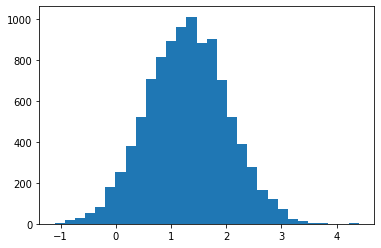

In [20]:
# plot sampling distribution
plt.hist(diffs, 30);

In [24]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), 10000)

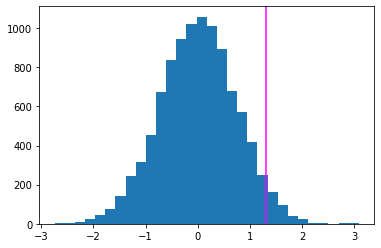

In [31]:
# plot null distribution
plt.hist(null_vals, bins=30);

# plot line for observed statistic
plt.axvline(obs_diff, color="magenta");

In [32]:
# compute p value
p = sum(null_vals > obs_diff) / 10000
p

0.0375

# Completion Rate

## What are the null and alternative hypotheses?

Is the completion rate of the experiment group $CR_{exp}$ higher than in the control group $CR_{ctr}$?

$$H_0: CR_{exp} - CR_{ctr} \leq 0  $$
$$H_1: CR_{exp} - CR_{ctr} > 0 $$ 

In [34]:
# Create dataframe with all control records
control_df = df.query("group == 'control'")

# Compute completion rate
control_cr = control_df.completed.mean()

# Display completion rate
control_cr

0.3719951923076923

In [35]:
# Create dataframe with all experiment records
experiment_df = df.query("group == 'experiment'") 

# Compute completion rate
experiment_ctr = experiment_df.completed.mean()

# Display completion rate
experiment_ctr

0.3935334872979215

In [36]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_cr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [39]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
for _ in range(10000):
    boot_exp = experiment_df.sample(experiment_df.shape[0], replace=True)
    boot_ctr = control_df.sample(experiment_df.shape[0], replace=True)
    boot_exp_compl = boot_exp.completed.mean()
    boot_ctr_compl = boot_ctr.completed.mean()
    diffs.append(boot_exp_compl - boot_ctr_compl)

In [40]:
# convert to numpy array
diffs = np.array(diffs)

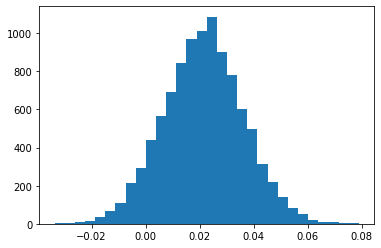

In [42]:
# plot distribution
plt.hist(diffs, 30);

In [48]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), df.size)

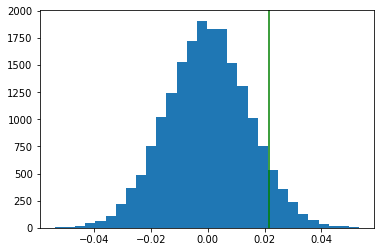

In [49]:
# plot null distribution
plt.hist(null_vals, 30);

# plot line for observed statistic
plt.axvline(obs_diff, color="green");

In [51]:
# compute p value
p = sum(null_vals > obs_diff) / df.size
p

0.06962653434317054